## <font color='black'>Análise Exploratória de Dados de E-Commerce</font>

Neste projeto de estudo, foi realizado a análise exploratória dos dados logísticos de um e-commerce, onde os dados foram explorados a fim de correlacioná-los à variável target que, no nosso caso, é se o produto foi ou não entregue no prazo!

In [2]:
# Importando os pacotes necessários para o trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Aqui foi feito uma pré definição de alguns parâmetros dos gráficos que serão plotados 

from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Carregando e explorando o Dataset

In [4]:
# Carregando os dados
df = pd.read_csv('dados/dataset.csv')

In [5]:
# Verificando a quantidade de linhas e colunas
df.shape

(11000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Visualizando uma amostra dos dados:

In [7]:
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [8]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9994,9995,C,Caminhao,2,1,135,4,media,F,8,5001,1
4966,4967,C,Navio,4,1,198,3,media,F,1,4090,0
6168,6169,D,Aviao,5,2,197,4,alta,M,4,4339,1
1040,1041,A,Navio,2,1,189,2,alta,M,48,2429,1
717,718,B,Navio,4,1,241,2,baixa,F,39,2935,1


In [9]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


### Separação das Variáveis Categóricas e Numéricas

In [10]:
# Verificando os nomes das colunas do dataset
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [11]:
# Exibindo os tipos das variáveis
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [12]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']

In [13]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

In [14]:
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [15]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


<AxesSubplot:>

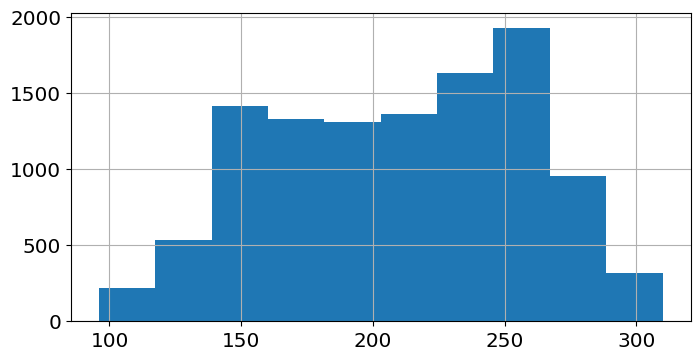

In [20]:
df['custo_produto'].hist()

<AxesSubplot:>

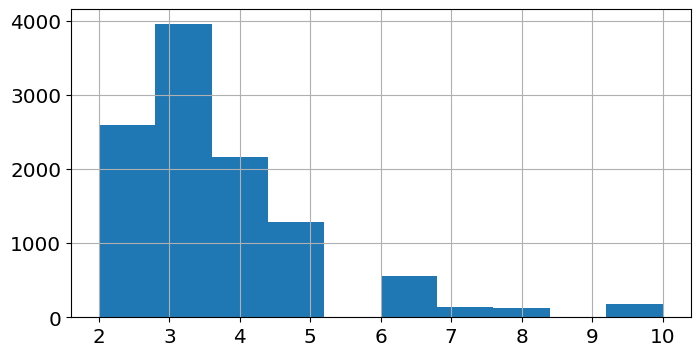

In [21]:
df['compras_anteriores'].hist()

<AxesSubplot:>

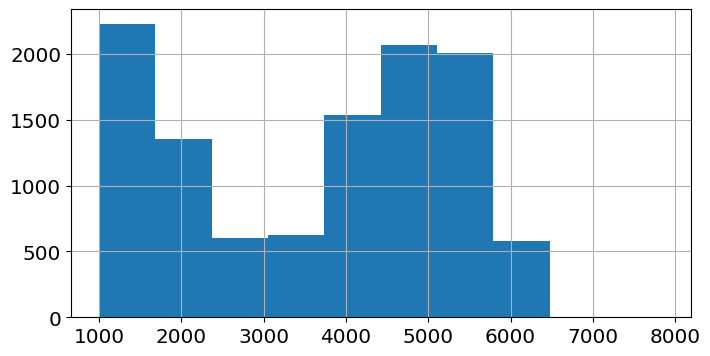

In [23]:
df['peso_gramas'].hist()

### Explorando as Variáveis Categóricas

In [24]:
# Resumo das variáveis categóricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [26]:
# Realizando uma contagem por categoria de cada variável categórica
for colunas in cats:
    print(f'''Contagem de Registros Por Categoria da Variável {colunas}:''')
    print(df[colunas].value_counts())
    print()

Contagem de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Contagem de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Contagem de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Contagem de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



#### Com os dados acima, podemos constatar quais os valores com maior recorrência em cada coluna categórica, por exemplo temos:
- Corredor F é onde mais possui registros;
- O maior número de entregas se dá por navio;
- Poucos produtos são de prioridade alta;
- A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.

### Análise Univariada - Box Plots

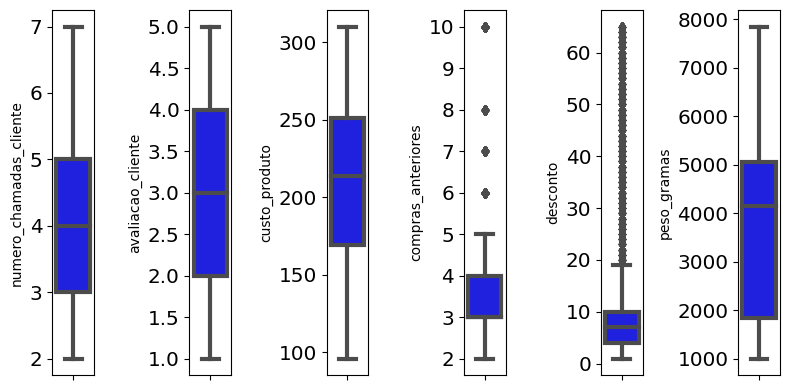

In [40]:
# Plotagem dos Box Plots.    
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

###  Com o Box Plot, podemos extrair de forma gráfica uma série de informações das variáveis, tais como:
- Média;
- 1º quartil;
- 2º quartil (mediana);
- 3º quartil;
- Valores mínimo e máximo;
- Outliers;
- Entender a dimensão da variância dos dados, isso pode ser verificado através do tamanho do "corpo" do gráfico.

### Análise Univariada - Count Plot 

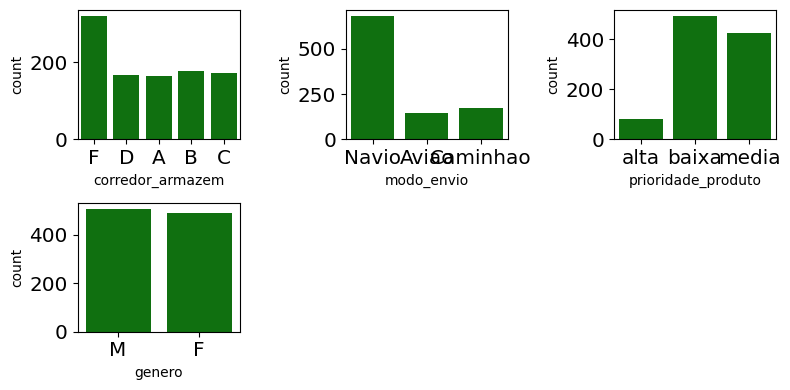

In [50]:
# Gráfico de barras simples, onde nos mostra graficamente as contagens dos valores de cada variável categórica.

df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

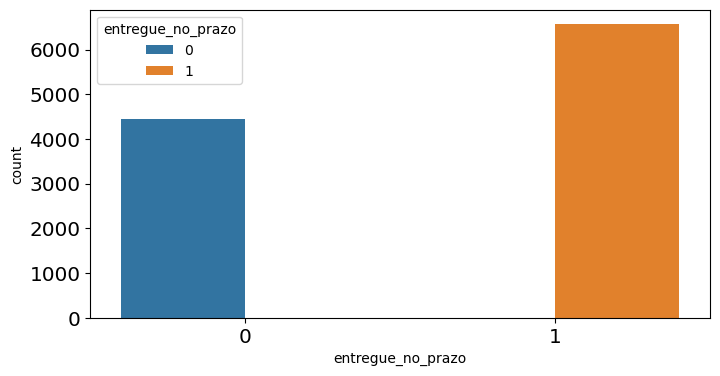

In [51]:
# Count Plot da variável target (sendo 0 para "não" e 1 para "sim")
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

### Correlação entre as variáveis

#### Uma breve explicação sobre os valores de correlação entre as variáveis:
- Os valores variam entre -1 e 1;
- -1 indica uma forte correlação negativa, ou seja, o aumento do valor de uma variável implica fortemente na diminuição do valor da outra;
- 1 indica uma forte correlação positiva, ou seja, o aumento do valor de uma variável implica fortemente no aumento do valor da outra;
- 0 nos indica que não há nenhuma correlação entre as variáveis em questão.

In [62]:
# Criando a tabela de correlação

corr_df = df[nums].corr()

In [56]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

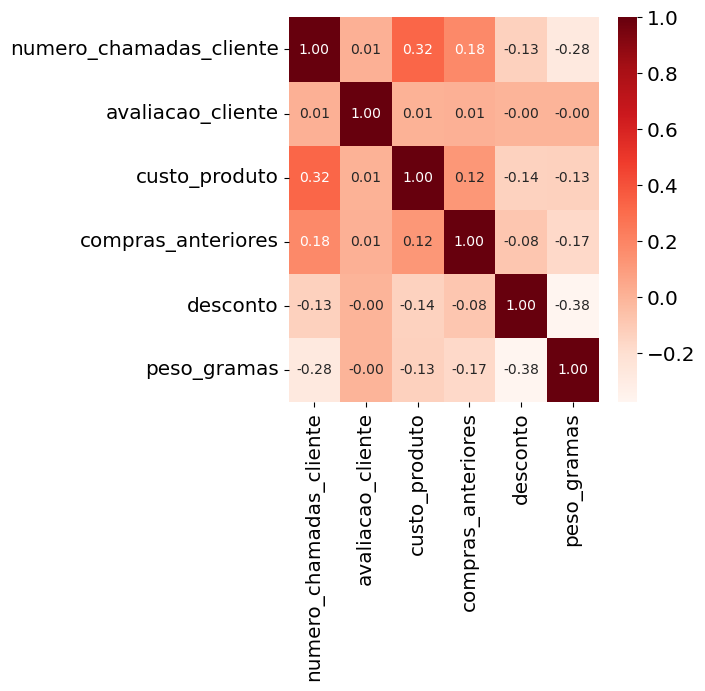

In [63]:
# Aqui nada mais é do que a tabela acima representada de forma gráfica, sendo mais fácil a visualização das correlações.
plt.figure(figsize = (5, 5))
sns.heatmap(corr_df, cmap = 'Reds', annot = True, fmt = '.2f')

Algumas informações que podem ser extraídas a partir do *mapa de correlação* acima são:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.


### Colunas Categóricas x Variável Target

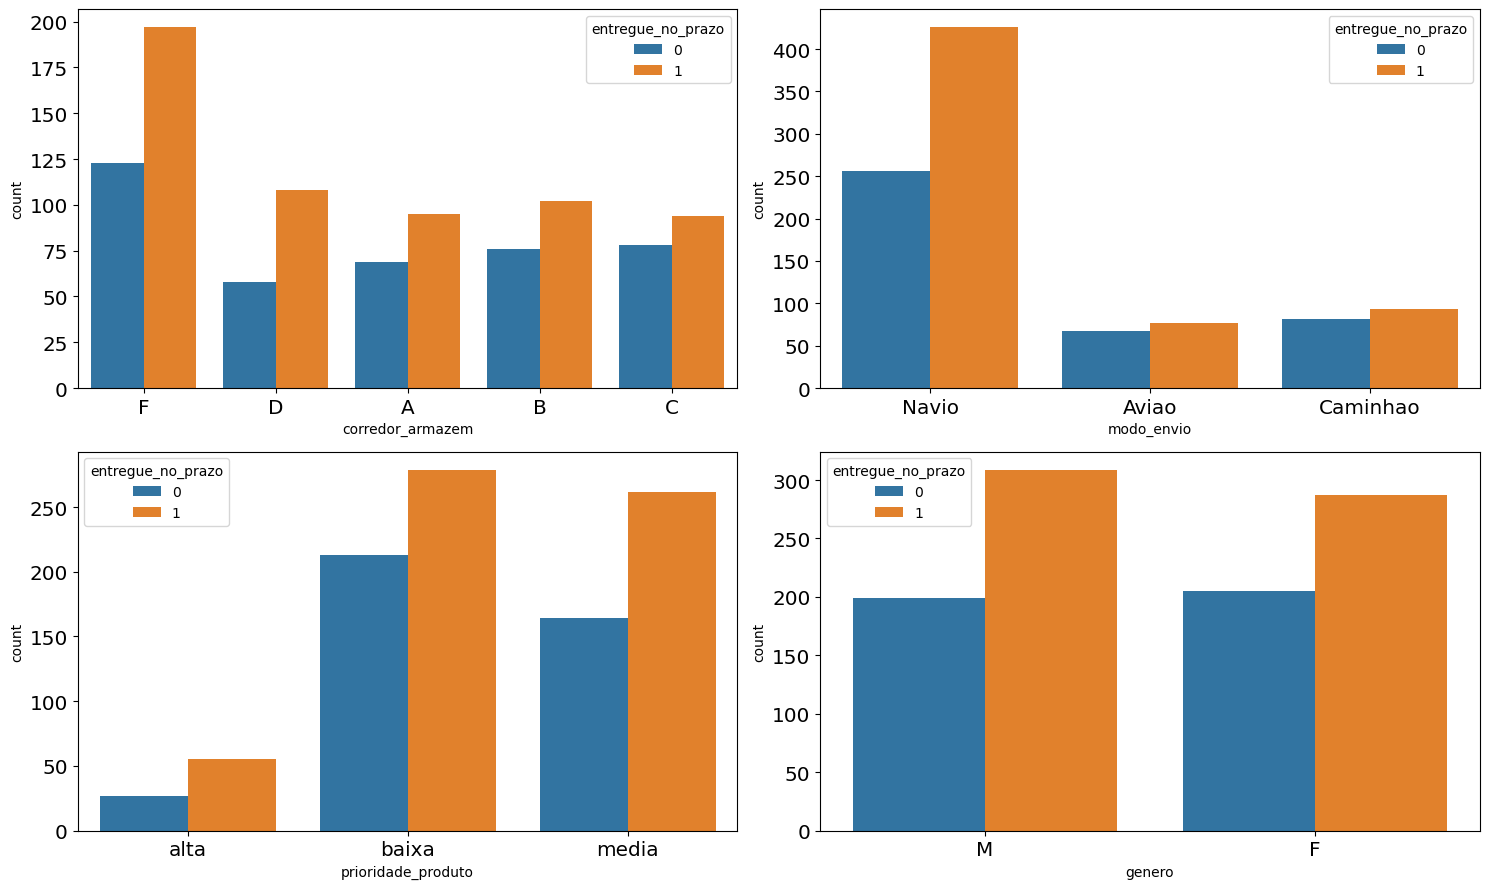

In [67]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Algumas análises extraídas das representações acima:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.